In [74]:
import scipy.io
import pandas as pd
import seaborn as sns
import numpy as np
import array
import matplotlib.pyplot as plt
import pywt
from scipy.signal import butter, filtfilt
from scipy import signal  
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#datset
data = scipy.io.loadmat('S01.mat')
data2 = scipy.io.loadmat('S02.mat')
data3 = scipy.io.loadmat('S03.mat')
data4 = scipy.io.loadmat('S04.mat')
data5 = scipy.io.loadmat('S05.mat')
data6 = scipy.io.loadmat('S06.mat')
data7 = scipy.io.loadmat('S07.mat')
data8 = scipy.io.loadmat('S08.mat')

In [75]:
#data segregated from the dataset
X = data['data'][0][0][0][0][0]
y = data['data'][0][0][0][0][3]
trial = data['data'][0][0][0][0][2]
fs=10
classes=data['data'][0][0][0][0][4]
X = X.astype(np.float64)
y = y.astype(np.float64)


X2=data2['data'][0][0][0][0][0]
X2=X2.astype(np.float64)
y2=data2['data'][0][0][0][0][3]
y2=y2.astype(np.float64)
trial2 = data2['data'][0][0][0][0][2]
trial2=trial2.astype(np.float64)
length=len(X)
for i in range(0,len(trial2)):
    trial2[i]=length+trial2[i]

if X.shape[0] != X2.shape[0]:
    X = np.concatenate((X, X2), axis=0)

y = np.concatenate((y, y2), axis=0)

trial = np.concatenate((trial, trial2), axis=0)
    
X3=data3['data'][0][0][0][0][0]
X3=X3.astype(np.float64)
y3=data3['data'][0][0][0][0][3]
y3=y3.astype(np.float64)
trial3 = data3['data'][0][0][0][0][2]
trial3=trial3.astype(np.float64)
length=len(X)
for i in range(0,len(trial3)):
    trial3[i]=length+trial3[i]

if X.shape[0] != X3.shape[0]:
    X = np.concatenate((X, X3), axis=0)

y = np.concatenate((y, y3), axis=0)

trial = np.concatenate((trial, trial3), axis=0)

X4=data4['data'][0][0][0][0][0]
X4=X4.astype(np.float64)
y4=data4['data'][0][0][0][0][3]
y4=y4.astype(np.float64)
trial4 = data4['data'][0][0][0][0][2]
trial4=trial4.astype(np.float64)
length=len(X)
for i in range(0,len(trial4)):
    trial4[i]=length+trial4[i]

if X.shape[0] != X4.shape[0]:
    X = np.concatenate((X, X4), axis=0)

y = np.concatenate((y, y4), axis=0)

trial = np.concatenate((trial, trial4), axis=0)

X5=data5['data'][0][0][0][0][0]
X5=X5.astype(np.float64)
y5=data5['data'][0][0][0][0][3]
y5=y5.astype(np.float64)
trial5 = data5['data'][0][0][0][0][2]
trial5=trial5.astype(np.float64)
length=len(X)
for i in range(0,len(trial5)):
    trial5[i]=length+trial5[i]

if X.shape[0] != X5.shape[0]:
    X = np.concatenate((X, X5), axis=0)

y = np.concatenate((y, y5), axis=0)

trial = np.concatenate((trial, trial5), axis=0)

X6=data6['data'][0][0][0][0][0]
X6=X6.astype(np.float64)
y6=data6['data'][0][0][0][0][3]
y6=y6.astype(np.float64)
trial6 = data6['data'][0][0][0][0][2]
trial6=trial6.astype(np.float64)
length=len(X)
for i in range(0,len(trial6)):
    trial6[i]=length+trial6[i]

if X.shape[0] != X6.shape[0]:
    X = np.concatenate((X, X6), axis=0)

y = np.concatenate((y, y6), axis=0)

trial = np.concatenate((trial, trial6), axis=0)

X7=data7['data'][0][0][0][0][0]
X7=X7.astype(np.float64)
y7=data7['data'][0][0][0][0][3]
y7=y7.astype(np.float64)
trial7 = data7['data'][0][0][0][0][2]
trial7=trial7.astype(np.float64)
length=len(X)
for i in range(0,len(trial7)):
    trial7[i]=length+trial7[i]

if X.shape[0] != X7.shape[0]:
    X = np.concatenate((X, X7), axis=0)

y = np.concatenate((y, y7), axis=0)

trial = np.concatenate((trial, trial7), axis=0)

X8=data8['data'][0][0][0][0][0]
X8=X8.astype(np.float64)
y8=data8['data'][0][0][0][0][3]
y8=y8.astype(np.float64)
trial8 = data8['data'][0][0][0][0][2]
trial8=trial8.astype(np.float64)
length=len(X)
for i in range(0,len(trial8)):
    trial8[i]=length+trial8[i]

if X.shape[0] != X8.shape[0]:
    X = np.concatenate((X, X8), axis=0)

y = np.concatenate((y, y8), axis=0)
trial = np.concatenate((trial, trial8), axis=0)

In [76]:
print(len(X))

21476


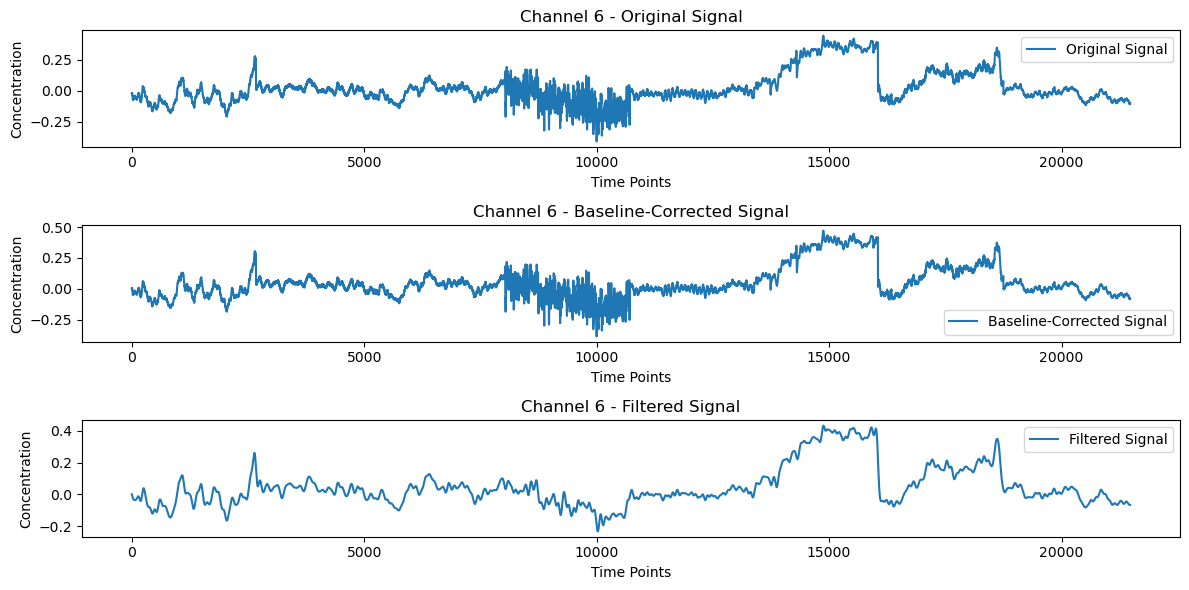

In [77]:
channel_to_visualize = 5
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(X[:, channel_to_visualize], label='Original Signal')
plt.title(f'Channel {channel_to_visualize + 1} - Original Signal')
plt.xlabel('Time Points')
plt.ylabel('Concentration')
plt.legend()

#applying baseline correction
def baseline_correction(data, baseline_window):
    baseline = np.mean(data[:baseline_window])  
    corrected_data = data - baseline
    return corrected_data

#applying lowpass filter
def lowpass_filter(data, cutoff_frequency, sampling_rate):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data, axis=0)
    return filtered_data

baseline_window = 10  
cutoff_frequency = 0.1  
sampling_rate = 10 

baseline_corrected_data1=baseline_correction(X[:, 5], baseline_window)

plt.subplot(3, 1, 2)
plt.plot(baseline_corrected_data1, label='Baseline-Corrected Signal')
plt.title(f'Channel {channel_to_visualize + 1} - Baseline-Corrected Signal')
plt.xlabel('Time Points')
plt.ylabel('Concentration')
plt.legend()

filtered_data1 = lowpass_filter(baseline_corrected_data1, cutoff_frequency, sampling_rate)

plt.subplot(3, 1, 3)
plt.plot(filtered_data1, label='Filtered Signal')
plt.title(f'Channel {channel_to_visualize + 1} - Filtered Signal')
plt.xlabel('Time Points')
plt.ylabel('Concentration')
plt.legend()

plt.tight_layout()
plt.show()

for channel in range(X.shape[1]):
    channel_data = X[:, channel]
    # Apply baseline correction
    baseline_corrected_data = baseline_correction(channel_data, baseline_window)
    # Apply low-pass filter
    filtered_data = lowpass_filter(baseline_corrected_data, cutoff_frequency, sampling_rate)
    
    X[:, channel] = filtered_data

In [78]:
final_X=[]
final_Y=[]
end_time=0
start_time=0
avg_time=5
for i in range(len(trial)):
    end_time=int(trial[i])
    task_label=y[i]
#     temp_arr=np.zeros(156)
#     for j in range(start_time,start_time+window_time):
#         for k in range(156):
#             temp_arr[k]=temp_arr[k]+X[j][k]
#     final_X.append(temp_arr)
#     final_Y.append(task_label)
#     st=int(start_time+window_time)
#     for j in range(st,end_time):
#         for k in range(156):
#             temp_arr[k]=temp_arr[k]+X[j][k]-X[j-window_time][k]
#         final_X.append(temp_arr)
#         final_Y.append(task_label)
    for j in range(start_time,end_time,avg_time):
        temp_arr=np.zeros(156)
        for k in range(j,j+avg_time):
            for l in range(156):
                temp_arr[l]=temp_arr[l]+X[k][l]
        for l in range(156):
            temp_arr[l]=temp_arr[l]/avg_time
        final_X.append(temp_arr)
        final_Y.append(task_label)
    start_time=end_time+20
        

In [79]:
print(len(final_X))

3885


In [80]:
n_channels = 52
final_X = np.array(final_X)

# Reshape the NumPy array
final_X = final_X.reshape(-1, n_channels, 3)
import numpy as np
import pywt
from joblib import Parallel, delayed

def apply_wavelet_transform(data, wavelet='cmor', scale_range=(1, 128), sampling_rate=10):
    coefficients = []

    def process_channel(channel_data):
        scales = np.arange(scale_range[0], scale_range[1] + 1)
        channel_coefficients, _ = pywt.cwt(channel_data, scales, wavelet)

        return channel_coefficients

    coefficients = Parallel(n_jobs=-1)(delayed(process_channel)(channel_data) for channel_data in data)

    return np.array(coefficients)

# Apply wavelet transform to each concentration type
X_wavelet_hbo = apply_wavelet_transform(final_X[:, :, 0])
X_wavelet_hbr = apply_wavelet_transform(final_X[:, :, 1])
X_wavelet_total_oxy = apply_wavelet_transform(final_X[:, :, 2])

# Concatenate the wavelet coefficients
X_wavelet = np.concatenate([X_wavelet_hbo, X_wavelet_hbr, X_wavelet_total_oxy], axis=-1)

# def apply_wavelet_transform(data, wavelet='cmor', scale_range=(1, 128), sampling_rate=10):
#     coefficients = []
#     scales = np.arange(scale_range[0], scale_range[1] + 1)
    
#     for channel_data in data:
#         # Apply wavelet transform to each channel
#         channel_coefficients = np.zeros((len(scales), len(channel_data)), dtype=complex)
        
#         for i, scale in enumerate(scales):
#             # Define the complex Morlet wavelet
#             frequency = scale / (2 * np.pi * sampling_rate)
#             wavelet_function = np.exp(2 * np.pi * 1j * frequency * np.arange(-len(channel_data)//2, len(channel_data)//2)) * np.exp(-np.arange(-len(channel_data)//2, len(channel_data)//2)**2 / (2 * (scale / 2.0 / np.pi / frequency)**2))
            
#             # Perform convolution using the wavelet
#             channel_coefficients[i, :] = scipy.signal.convolve(channel_data, wavelet_function, mode='same', method='fft')
        
#         coefficients.append(channel_coefficients)
    
#     return np.array(coefficients)

# # Apply wavelet transform to each concentration type
# X_wavelet_hbo = apply_wavelet_transform(final_X[:, :, 0])
# X_wavelet_hbr = apply_wavelet_transform(final_X[:, :, 1])
# X_wavelet_total_oxy = apply_wavelet_transform(final_X[:, :, 2])

# # Concatenate the wavelet coefficients
# X_wavelet = np.concatenate([X_wavelet_hbo, X_wavelet_hbr, X_wavelet_total_oxy], axis=-1)

In [81]:
from scipy.signal import welch
from sklearn.decomposition import PCA

def extract_features(data, n_components=50):
    magnitude_values = np.abs(data)
    if magnitude_values.ndim == 2:
        magnitude_values = magnitude_values[:, :, np.newaxis]

    mean_values = np.mean(magnitude_values, axis=2)
    std_values = np.std(magnitude_values, axis=2)

    # Using Welch method
    _, psd_values = welch(magnitude_values, axis=2, nperseg=min(64, magnitude_values.shape[2]))
    
    # Concatenate mean_values and std_values along the second axis
    mean_std_values = np.concatenate([mean_values, std_values], axis=1)

    # Reshape psd_values for proper concatenation
    psd_values_reshaped = psd_values.reshape(psd_values.shape[0], -1)

    # Reduce dimensionality using PCA
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(np.concatenate([mean_std_values, psd_values_reshaped], axis=1))

    return reduced_features.flatten()

# Applying feature extraction with reduced dimensionality to each concentration type and each time point
n_components = 50  # Adjust the number of components as needed
X_features_hbo = np.array([extract_features(time_point, n_components) for time_point in X_wavelet_hbo])
X_features_hbr = np.array([extract_features(time_point, n_components) for time_point in X_wavelet_hbr])
X_features_total_oxy = np.array([extract_features(time_point, n_components) for time_point in X_wavelet_total_oxy])

# Concatenating the reduced feature vectors
X_features = np.concatenate([X_features_hbo, X_features_hbr, X_features_total_oxy], axis=1)

# Print or use the reduced feature matrix as needed
print("Reduced Feature Matrix shape:", X_features.shape)
print("Example reduced feature matrix row:", X_features[0])


Reduced Feature Matrix shape: (3885, 19200)
Example reduced feature matrix row: [ 9.32936196e-02  2.90721275e-02  4.40845115e-02 ... -1.94584678e-04
  8.40300111e-05  4.95162017e-05]


In [82]:

# y_combined = []
# start_time=0
# for i, x in enumerate(trial):
#     task_label = y[i]
#     # Repeating the task label for all the time points in the trail
#     end_time=x[0]+20
#     y_combined.extend([task_label] * (end_time-start_time))
#     start_time=end_time

# y_combined = np.array(y_combined)
# y_new=np.zeros(len(y_combined))
# for i in range(len(y_combined)):
#     y_new[i]=y_combined[i][0]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_features,final_Y, test_size=0.2, random_state=42)

In [84]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import numpy as np

# Checking for features with zero variance
non_constant_features = np.where(X_train.std(axis=0) != 0)[0]

# Applying VarianceThreshold to remove features with zero variance
selector = VarianceThreshold()
X_train = selector.fit_transform(X_train[:, non_constant_features])
X_test = selector.transform(X_test[:, non_constant_features])

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
import numpy as np

# Assuming y_train and y_test are lists
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

# (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [85]:
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [87]:
img_X=[]
img_Y=[]
end_time=0
start_time=0
avg_time=5
for i in range(len(trial)):
    end_time=int(trial[i])
    task_label=y[i]
#     temp_arr=np.zeros(156)
#     for j in range(start_time,start_time+window_time):
#         for k in range(156):
#             temp_arr[k]=temp_arr[k]+X[j][k]
#     final_X.append(temp_arr)
#     final_Y.append(task_label)
#     st=int(start_time+window_time)
#     for j in range(st,end_time):
#         for k in range(156):
#             temp_arr[k]=temp_arr[k]+X[j][k]-X[j-window_time][k]
#         final_X.append(temp_arr)
#         final_Y.append(task_label)
    for j in range(start_time,end_time,avg_time):
        temp_arr=np.zeros(156)
        for k in range(j,j+avg_time):
            for l in range(156):
                temp_arr[l]=temp_arr[l]+X[k][l]
        for l in range(156):
            temp_arr[l]=temp_arr[l]/avg_time
        img_X.append(temp_arr)
        img_Y.append(task_label)
    start_time=end_time+20

In [90]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Convert the list to a NumPy array
img_X_array = np.array(img_X)

# Reshape data to 3D array (assuming each sample is a 2D array)
img_X_3D = img_X_array.reshape(img_X_array.shape[0], img_X_array.shape[1], 1)

In [91]:
img_X_normalized = img_X_3D / np.max(img_X_3D)

In [92]:
img_Y_encoded = np.where(np.array(img_Y) == 1, 0, 1)


In [93]:
x_train, x_test, y_train, y_test = train_test_split(
    img_X_normalized, img_Y_encoded, test_size=0.2, random_state=42
)


In [94]:
# Build CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(img_X_array.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [95]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
78/78 [==============================] - 2s 7ms/step - loss: 0.5974 - accuracy: 0.7325 - val_loss: 0.5499 - val_accuracy: 0.7605
Epoch 2/10
78/78 [==============================] - 0s 4ms/step - loss: 0.5772 - accuracy: 0.7353 - val_loss: 0.5465 - val_accuracy: 0.7605
Epoch 3/10
78/78 [==============================] - 0s 4ms/step - loss: 0.5725 - accuracy: 0.7353 - val_loss: 0.5434 - val_accuracy: 0.7605
Epoch 4/10
78/78 [==============================] - 0s 5ms/step - loss: 0.5709 - accuracy: 0.7353 - val_loss: 0.5442 - val_accuracy: 0.7605
Epoch 5/10
78/78 [==============================] - 0s 5ms/step - loss: 0.5695 - accuracy: 0.7353 - val_loss: 0.5428 - val_accuracy: 0.7605
Epoch 6/10
78/78 [==============================] - 0s 5ms/step - loss: 0.5654 - accuracy: 0.7353 - val_loss: 0.5378 - val_accuracy: 0.7605
Epoch 7/10
78/78 [==============================] - 0s 4ms/step - loss: 0.5644 - accuracy: 0.7353 - val_loss: 0.5350 - val_accuracy: 0.7605
Epoch 8/10
78/78 [==

In [97]:
# Evaluate the model
evaluation = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")

25/25 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7426
Test Accuracy: 74.26%
